In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
anku = r"C:\Users\khush\Downloads\My Uber Drives - 2016.csv"
print(anku)

C:\Users\khush\Downloads\My Uber Drives - 2016.csv


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv(anku, na_values = ["", "NA"], keep_default_na = False)
df

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [5]:
df.shape

(1156, 7)

In [6]:
df.columns

Index(['START_DATE*', 'END_DATE*', 'CATEGORY*', 'START*', 'STOP*', 'MILES*',
       'PURPOSE*'],
      dtype='object')

In [7]:
df.duplicated().sum()

1

In [8]:
df = df.drop_duplicates(keep = "first").reset_index(drop = True)
df

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1150,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1151,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1152,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1153,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [9]:
df.duplicated().sum()

0

In [10]:
df.isna().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

In [11]:
def khu(df):
    cat = list(df.columns[df.dtypes == "object"])
    for i in df.columns:
        if i in cat:
            mode = df[i].mode()[0]
            df[i] = df[i].fillna(mode)
        else:
            mean = df[i].mean()
            df[i] = df[i].fillna(mean)

In [12]:
khu(df)

In [13]:
df.isnull().sum()

START_DATE*    0
END_DATE*      0
CATEGORY*      0
START*         0
STOP*          0
MILES*         0
PURPOSE*       0
dtype: int64

In [14]:
cat = []
con = []

for j in df.columns:
    if df[j].dtypes == "object":
        cat.append(j)
    else:
        con.append(j)    

In [15]:
cat

['START_DATE*', 'END_DATE*', 'CATEGORY*', 'START*', 'STOP*', 'PURPOSE*']

In [16]:
con

['MILES*']

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1155 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1155 non-null   float64
 6   PURPOSE*     1155 non-null   object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [18]:
import os
a = r"D:\My Uber Drives Analysis Project - 2016"
os.chdir(a)

In [19]:
df.to_csv("My Uber Drives Clean Dataset - 2016.csv", index = False)

In [20]:
df[cat].describe()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,PURPOSE*
count,1155,1155,1155,1155,1155,1155
unique,1155,1154,2,177,188,10
top,1/1/2016 21:11,1/1/2016 21:17,Business,Cary,Cary,Meeting
freq,1,2,1078,202,203,689


In [21]:
df[con].describe()

,MILES*
count,1155.000000
mean,21.125108
std,359.454497
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


In [22]:
df.groupby(by = ["MILES*"]).count()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,PURPOSE*
MILES*,,,,,,
0.5,3,3,3,3,3,3
0.6,5,5,5,5,5,5
0.7,8,8,8,8,8,8
0.8,6,6,6,6,6,6
0.9,8,8,8,8,8,8
...,...,...,...,...,...,...
195.6,1,1,1,1,1,1
195.9,1,1,1,1,1,1
201.0,1,1,1,1,1,1


In [23]:
df.groupby(by = ["CATEGORY*"]).count()

,START_DATE*,END_DATE*,START*,STOP*,MILES*,PURPOSE*
CATEGORY*,,,,,,
Business,1078,1078,1078,1078,1078,1078
Personal,77,77,77,77,77,77


Total trips in 2016: 1154


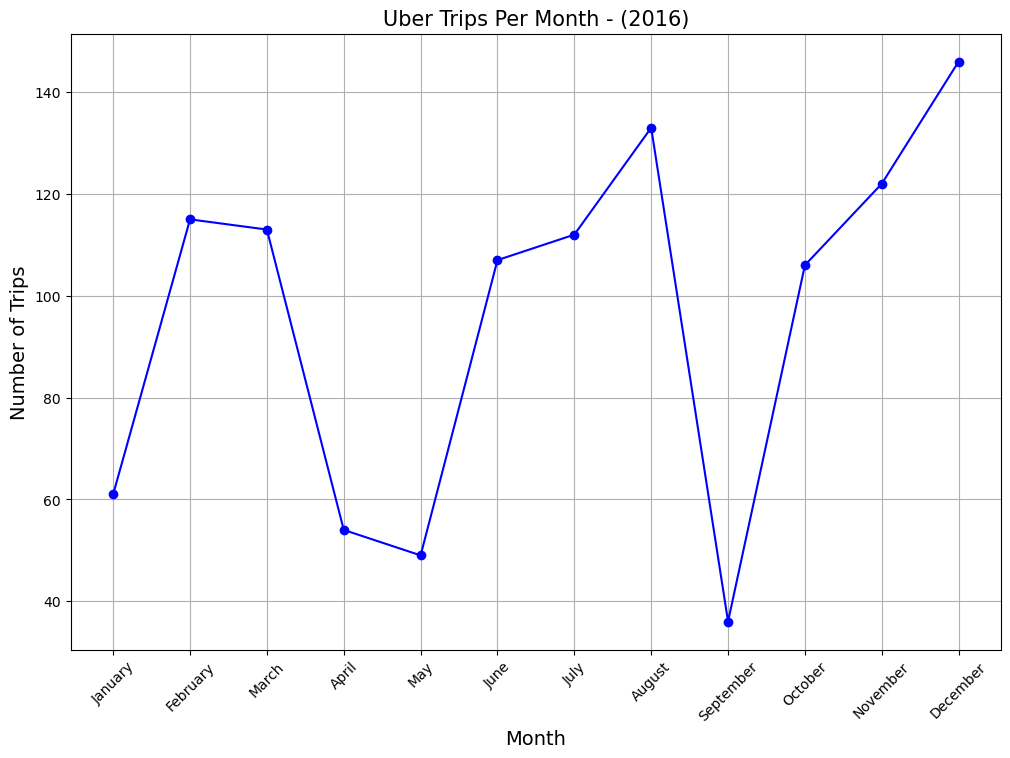

In [24]:
# Q.1) How many total trips were taken in 2016?

df["START_DATE*"] = pd.to_datetime(df["START_DATE*"], errors = "coerce")
df["Year"] = df["START_DATE*"].dt.year
df["Month"] = df["START_DATE*"].dt.month_name()
df_2016 = df[df["Year"] == 2016]
total_trips = df_2016.shape[0]
print("Total trips in 2016:", total_trips)
trips_per_month = df_2016.groupby(df_2016["START_DATE*"].dt.month_name()).size()
months_order = ["January", "February", "March", "April", "May", "June",
                "July", "August", "September", "October", "November", "December"]
trips_per_month = trips_per_month.reindex(months_order)
plt.figure(figsize = (12, 8))
plt.plot(trips_per_month.index, trips_per_month.values, marker = "o", linestyle = "-", color = "blue")
plt.title("Uber Trips Per Month - (2016)", fontsize = 15)
plt.xlabel("Month", fontsize = 14)
plt.ylabel("Number of Trips", fontsize = 14)
plt.xticks(rotation = 45)
plt.grid(True)
plt.show()

Average distance of trips in 2016: 10.57 miles


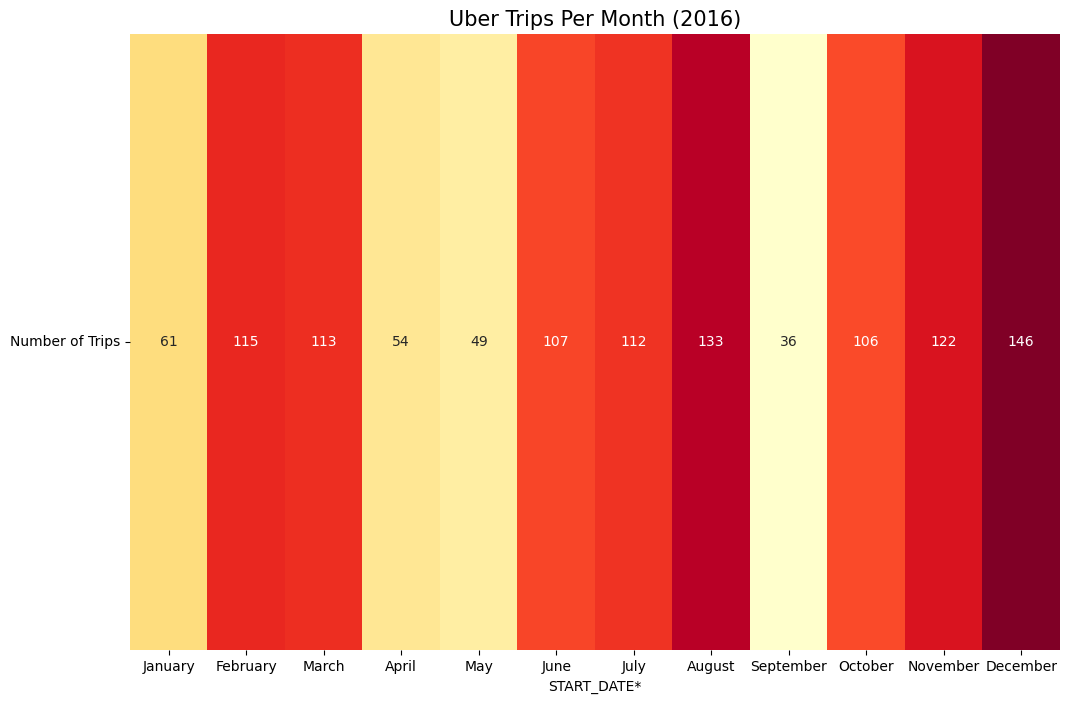

In [25]:
# Q.2) What is the average distance of trips?

df["START_DATE*"] = pd.to_datetime(df["START_DATE*"], errors = "coerce")
df["Year"] = df["START_DATE*"].dt.year
df_2016 = df[df["Year"] == 2016]
avg_distance = df_2016["MILES*"].mean()
print("Average distance of trips in 2016:", round(avg_distance, 2), "miles")
trips_per_month = df_2016.groupby(df_2016["START_DATE*"].dt.month_name()).size()
months_order = ["January", "February", "March", "April", "May", "June",
                "July", "August", "September", "October", "November", "December"]
trips_per_month = trips_per_month.reindex(months_order)
heatmap_data = pd.DataFrame(trips_per_month, columns = ["Number of Trips"]).T
plt.figure(figsize = (12, 8))
sns.heatmap(heatmap_data, annot = True, fmt = "d", cmap = "YlOrRd", cbar = False)
plt.title("Uber Trips Per Month (2016)", fontsize = 15)
plt.yticks(rotation = 0)
plt.show()

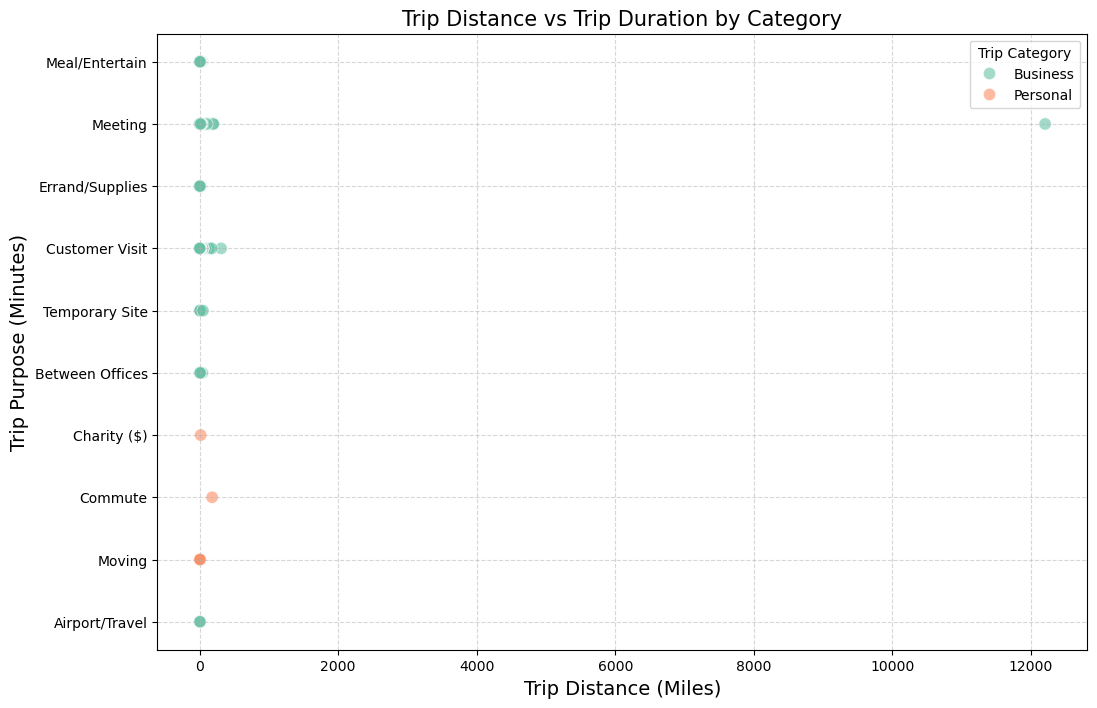

In [26]:
# Q.3) How many trips belong to Business vs. Personal category?

plt.figure(figsize = (12, 8))
sns.scatterplot(
    data = df,
    x = "MILES*",
    y = "PURPOSE*",
    hue = "CATEGORY*",
    palette = "Set2",
    alpha = 0.6,
    s = 80
)
plt.title("Trip Distance vs Trip Duration by Category", fontsize = 15)
plt.xlabel("Trip Distance (Miles)", fontsize = 14)
plt.ylabel("Trip Purpose (Minutes)", fontsize = 14)
plt.grid(True, linestyle = "--", alpha = 0.5)
plt.legend(title = "Trip Category")
plt.show()

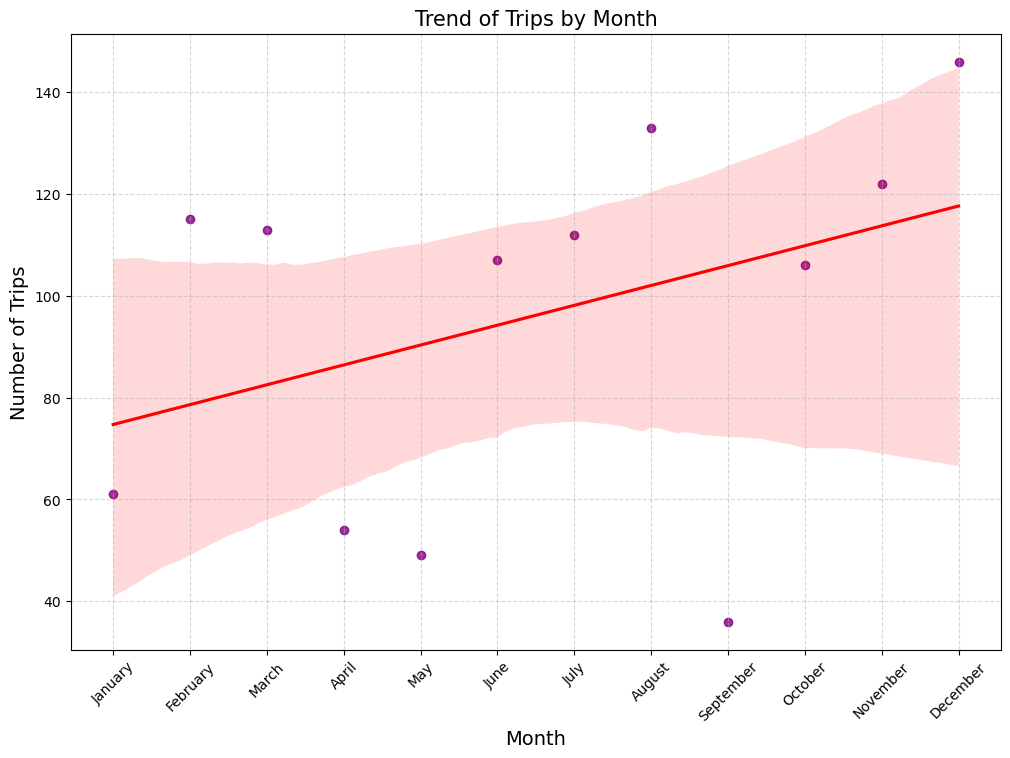

In [27]:
# Q.4) How does the number of trips vary by month?

df["START_DATE*"] = pd.to_datetime(df["START_DATE*"])
df["Month_Num"] = df["START_DATE*"].dt.month
trips_per_month = df.groupby("Month_Num").size().reset_index(name = "trip_count")
plt.figure(figsize = (12, 8))
sns.regplot(
    data = trips_per_month,
    x = "Month_Num",
    y = "trip_count",
    marker = "o",
    color = "purple",
    line_kws = {"color":"red"}
)
months_order = ["January", "February", "March", "April", "May", "June",
                "July", "August", "September", "October", "November", "December"]
plt.xticks(ticks = range(1, 13), labels = months_order, rotation = 45)
plt.title("Trend of Trips by Month", fontsize = 15)
plt.xlabel("Month", fontsize = 14)
plt.ylabel("Number of Trips", fontsize = 14)
plt.grid(True, linestyle = "--", alpha = 0.5)
plt.show()

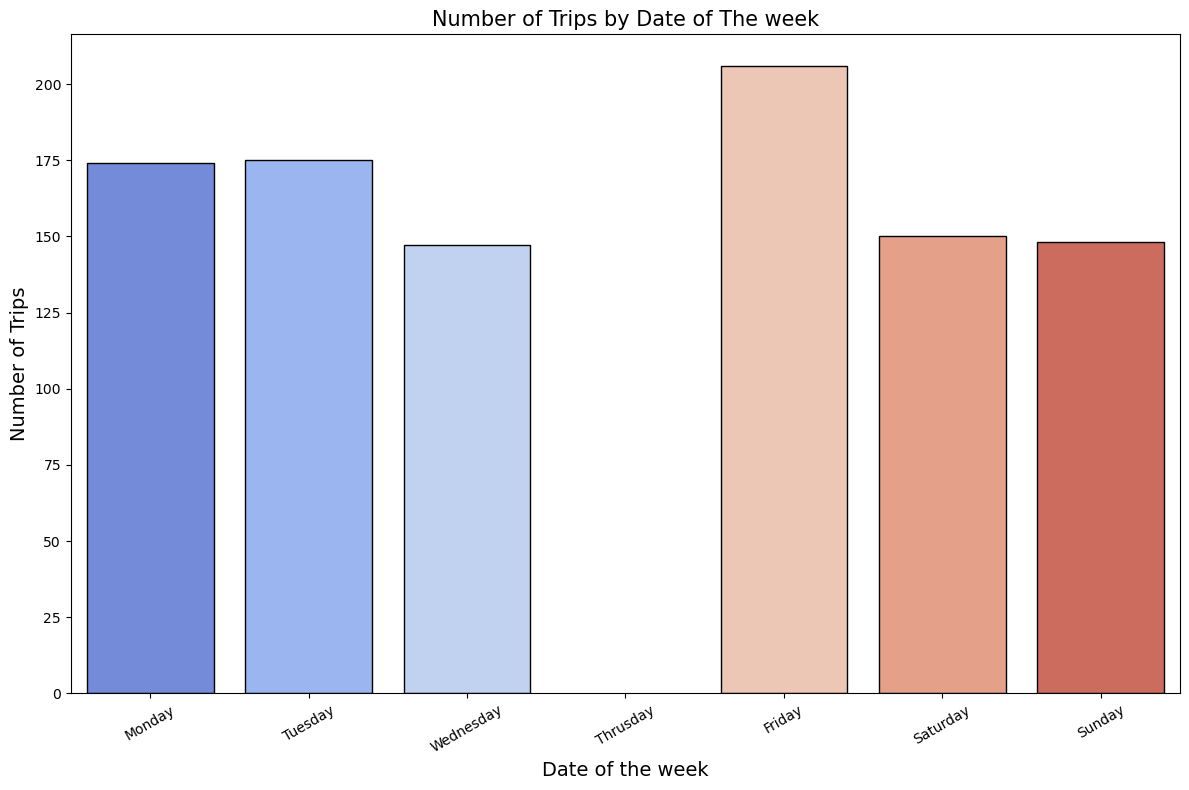

In [28]:
# Q.5) On which day of the week are the most trips taken?

df["START_DATE*"] = pd.to_datetime(df["START_DATE*"])
df["Date_of_week"] = df["START_DATE*"].dt.day_name()
days_order = ["Monday", "Tuesday", "Wednesday", "Thrusday", "Friday", "Saturday", "Sunday"]
plt.figure(figsize = (12, 8))
sns.countplot(data = df, x = "Date_of_week", order = days_order, palette = "coolwarm", edgecolor = "black")
plt.title("Number of Trips by Date of The week", fontsize = 15)
plt.xlabel("Date of the week", fontsize = 14)
plt.ylabel("Number of Trips", fontsize = 14)
plt.xticks(rotation = 30)
plt.tight_layout()
plt.show()

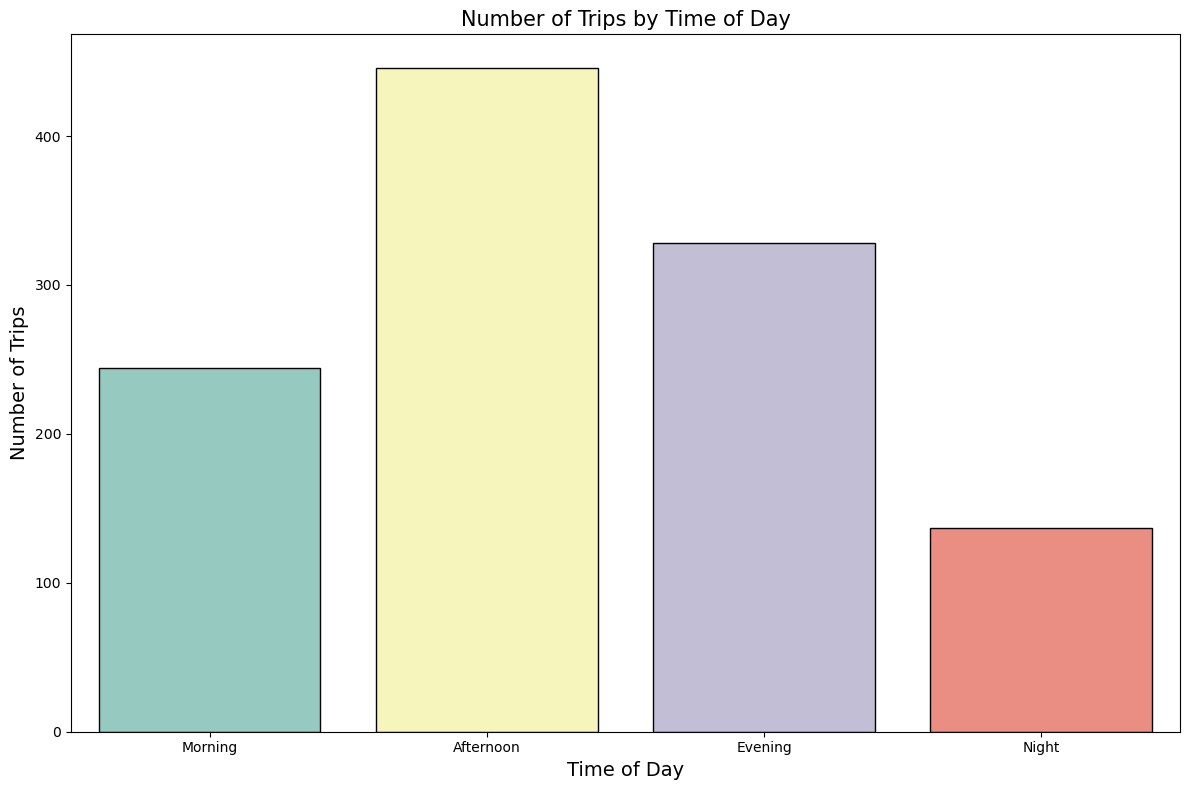

In [29]:
# Q.6) At what time of day (morning, afternoon, evening, night) do most trips occur?

df["START_DATE*"] = pd.to_datetime(df["START_DATE*"])
df["Hour"] = df["START_DATE*"].dt.hour
def get_time_of_day(hour):
    if 5 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 17:
        return "Afternoon"
    elif 17 <= hour < 21:
        return "Evening"
    else:
        return "Night"
df["Time_of_Day"] = df["Hour"].apply(get_time_of_day)
time_order = ["Morning", "Afternoon", "Evening", "Night"]
plt.figure(figsize = (12, 8))
sns.countplot(data = df, x = "Time_of_Day", order = time_order, palette = "Set3", edgecolor = "black")
plt.title("Number of Trips by Time of Day", fontsize = 15)
plt.xlabel("Time of Day", fontsize = 14)
plt.ylabel("Number of Trips", fontsize = 14)
plt.tight_layout()
plt.show()

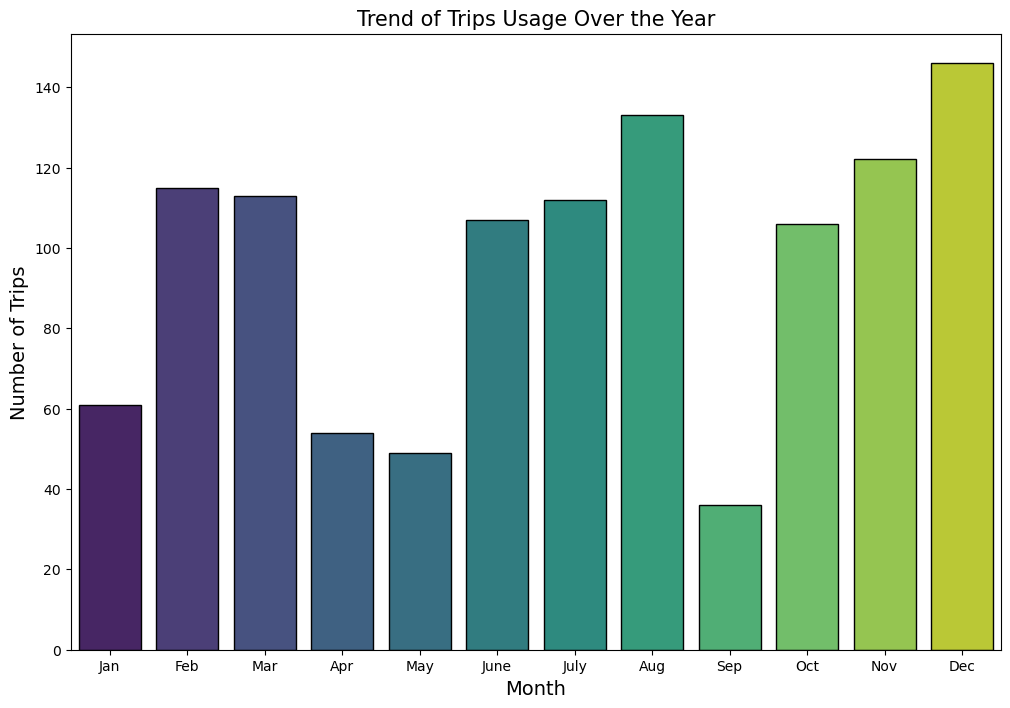

In [30]:
# Q.7) What is the trend of trip usage over the year (increasing/decreasing)?

df["START_DATE*"] = pd.to_datetime(df["START_DATE*"])
df["Month"] = df["START_DATE*"].dt.month
trips_per_month = df["Month"].value_counts().sort_index()
plt.figure(figsize = (12, 8))
sns.barplot(x = trips_per_month.index, y = trips_per_month.values, palette = "viridis", edgecolor = "black")
plt.title("Trend of Trips Usage Over the Year", fontsize = 15)
plt.xlabel("Month", fontsize = 14)
plt.ylabel("Number of Trips", fontsize = 14)
plt.xticks(range (0, 12),
          ["Jan", "Feb", "Mar", "Apr", "May", "June", "July", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.show()

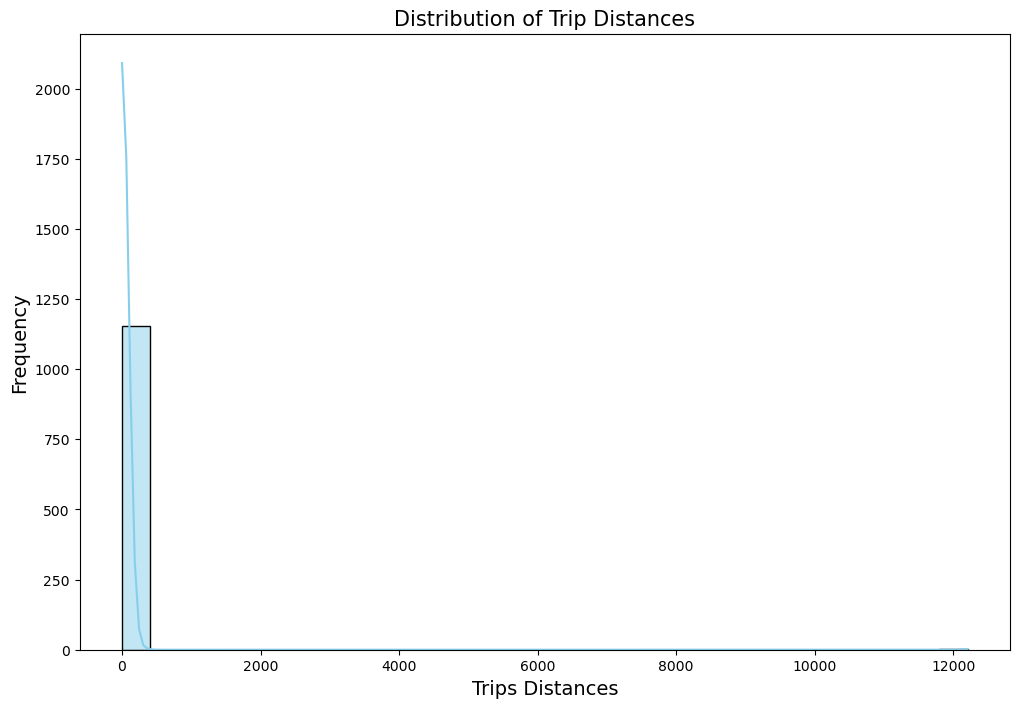

In [31]:
# Q.8) What is the distribution of trip distances?

plt.figure(figsize = (12, 8))
sns.histplot(df["MILES*"], bins = 30, kde = True, color = "skyblue")
plt.title("Distribution of Trip Distances", fontsize = 15)
plt.xlabel("Trips Distances", fontsize = 14)
plt.ylabel("Frequency", fontsize = 14)
plt.show()

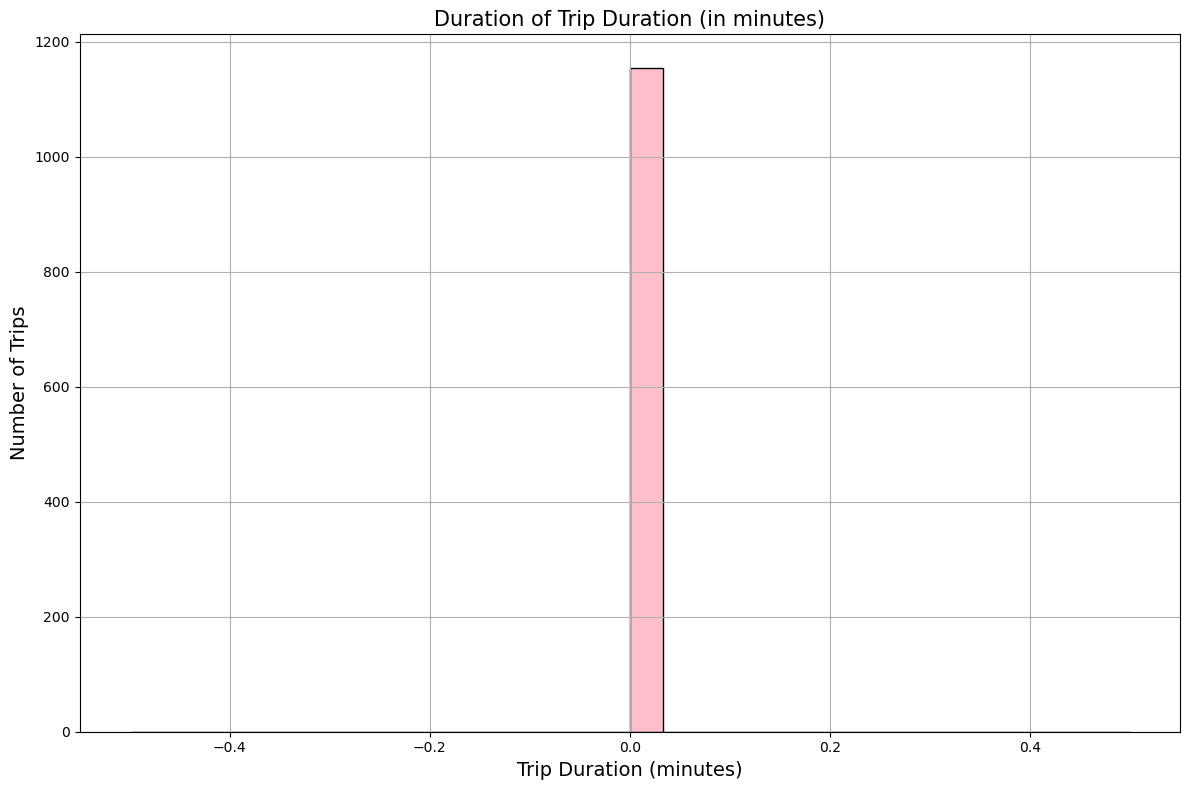

In [32]:
# Q.9) How does trip duration (End Time – Start Time) vary across trips?

df["START_DATE*"] = pd.to_datetime(df["END_DATE*"])
df["END_DATE*"] = pd.to_datetime(df["END_DATE*"])
df["trip_duration"] = (df["END_DATE*"] - df["START_DATE*"]).dt.total_seconds() / 60
plt.figure(figsize = (12, 8))
plt.hist(df["trip_duration"], bins = 30, color = "pink", edgecolor = "black")
plt.title("Duration of Trip Duration (in minutes)", fontsize = 15)
plt.xlabel("Trip Duration (minutes)", fontsize = 14)
plt.ylabel("Number of Trips", fontsize = 14)
plt.grid(True)
plt.tight_layout()
plt.show()

Most Common Trip Purposes:
PURPOSE*
Meeting            689
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: count, dtype: int64


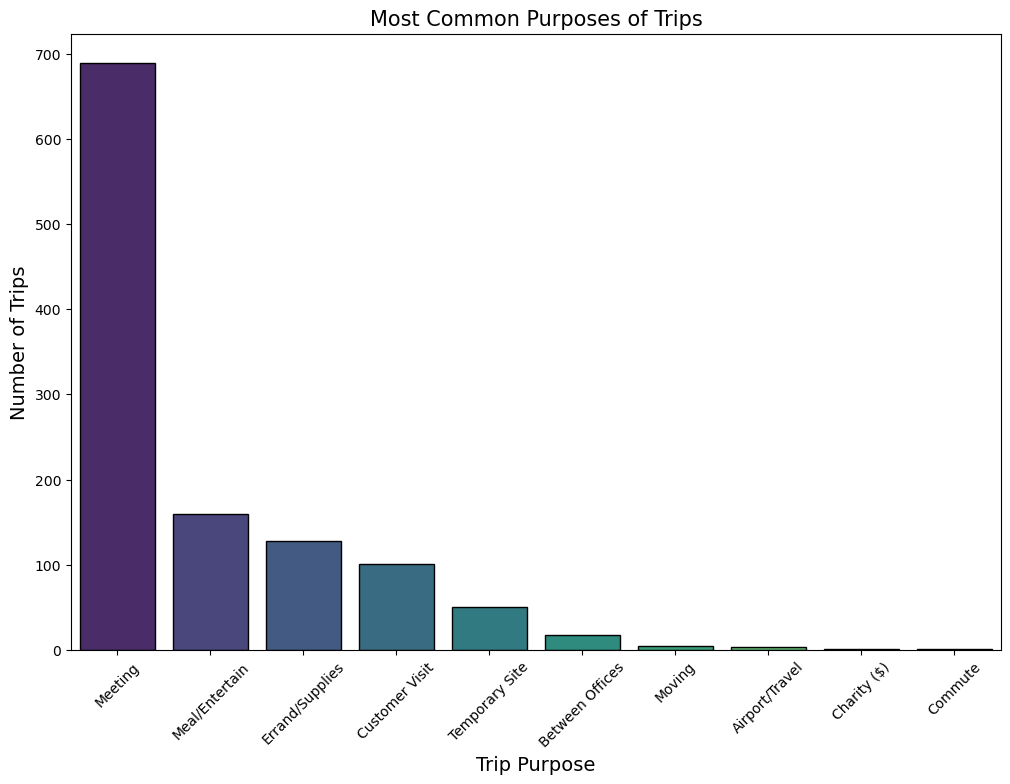

In [33]:
# Q.10) What are the most common purposes of trips (Meeting, Customer Visit, etc.)?

purpose_counts = df["PURPOSE*"].value_counts()
print("Most Common Trip Purposes:")
print(purpose_counts.head(10))
plt.figure(figsize = (12, 8))
sns.barplot(
    x = purpose_counts.index,
    y = purpose_counts.values,
    palette = "viridis",
    edgecolor = "black"
)
plt.title("Most Common Purposes of Trips", fontsize = 15)
plt.xlabel("Trip Purpose", fontsize = 14)
plt.ylabel("Number of Trips", fontsize = 14)
plt.xticks(rotation = 45)
plt.show()

Average Trip Distance by Purpose:
PURPOSE*
Commute            180.200000
Meeting             28.939913
Customer Visit      20.688119
Charity ($)         15.100000
Between Offices     10.944444
Temporary Site      10.474000
Meal/Entertain       5.698125
Airport/Travel       5.500000
Moving               4.550000
Errand/Supplies      3.968750
Name: MILES*, dtype: float64


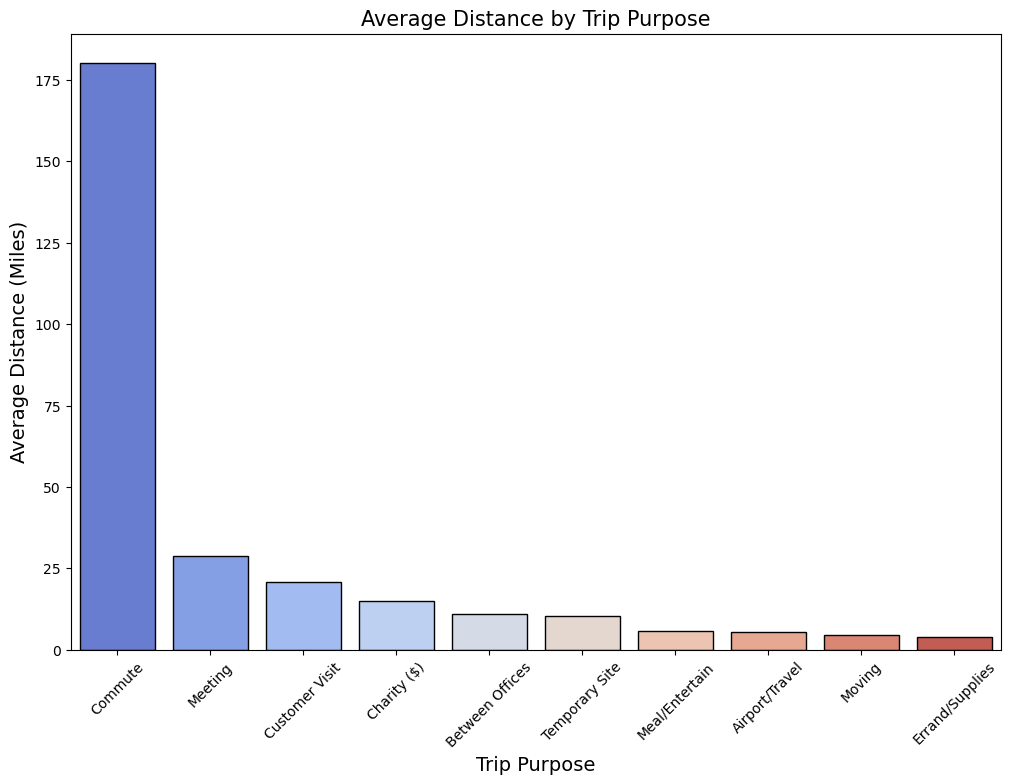

In [34]:
# Q.11) Which purposes involve the longest average distance?

avg_distance_by_purpose = df.groupby("PURPOSE*")["MILES*"].mean().sort_values(ascending = False)
print("Average Trip Distance by Purpose:")
print(avg_distance_by_purpose)
plt.figure(figsize = (12, 8))
sns.barplot(
    x = avg_distance_by_purpose.index,
    y = avg_distance_by_purpose.values,
    palette = "coolwarm",
    edgecolor = "black"
)
plt.title("Average Distance by Trip Purpose", fontsize = 15)
plt.xlabel("Trip Purpose", fontsize = 14)
plt.ylabel("Average Distance (Miles)", fontsize = 14)
plt.xticks(rotation = 45)
plt.show()

Purposes Usually Associated with Short Trips:
PURPOSE*
Errand/Supplies    3.10
Meal/Entertain     4.25
Moving             4.40
Airport/Travel     4.80
Meeting            6.90
Name: MILES*, dtype: float64


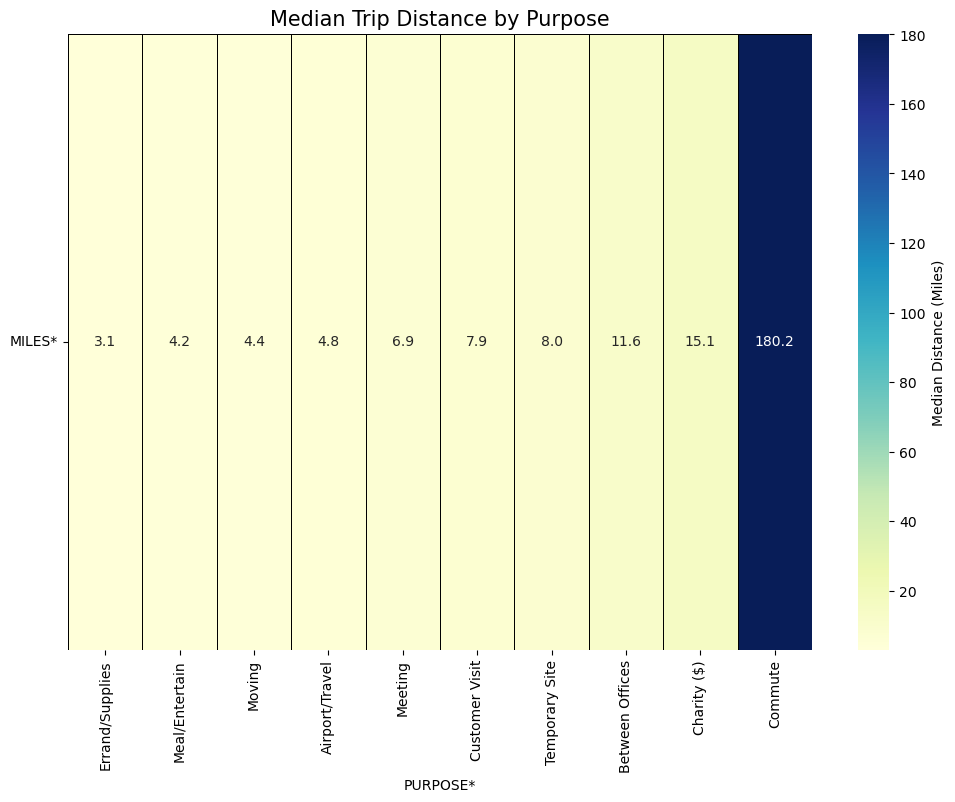

In [35]:
# Q.12) Is there any purpose that is usually associated with short trips?

median_distance_by_purpose = df.groupby("PURPOSE*")["MILES*"].median().sort_values()
print("Purposes Usually Associated with Short Trips:")
print(median_distance_by_purpose.head(5))
heatmap_data = pd.DataFrame(median_distance_by_purpose).T
plt.figure(figsize = (12, 8))
sns.heatmap(
    heatmap_data,
    annot = True,
    fmt = ".1f",
    cmap = "YlGnBu",
    cbar_kws = {'label': 'Median Distance (Miles)'},
    linewidths = 0.5,
    linecolor = 'black'
)
plt.title("Median Trip Distance by Purpose", fontsize = 15)
plt.yticks(rotation = 0)
plt.show()

Top Start Locations:
START*
Cary                202
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
Lahore               36
Durham               36
Raleigh              28
Kar?chi              27
Westpark Place       17
Name: count, dtype: int64


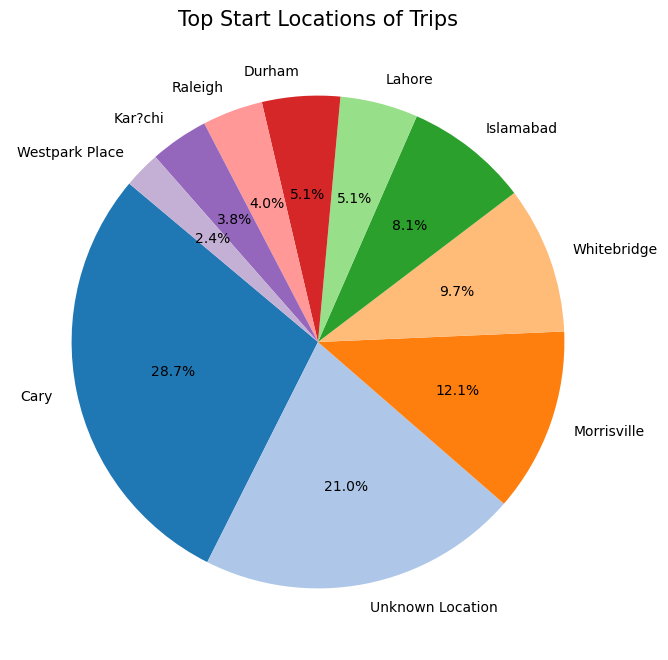

In [36]:
# Q.13) Which are the top start locations?

top_start_locations = df["START*"].value_counts().head(10)
print("Top Start Locations:")
print(top_start_locations)
plt.figure(figsize = (12, 8))
plt.pie(
    top_start_locations.values,
    labels = top_start_locations.index,
    autopct = '%1.1f%%',
    startangle = 140,
    colors = plt.cm.tab20.colors
)
plt.title("Top Start Locations of Trips", fontsize = 15)
plt.show()

Top Stop Locations:
STOP*
Cary                203
Unknown Location    149
Morrisville          84
Whitebridge          65
Islamabad            58
Durham               36
Lahore               36
Raleigh              29
Kar?chi              26
Apex                 17
Name: count, dtype: int64


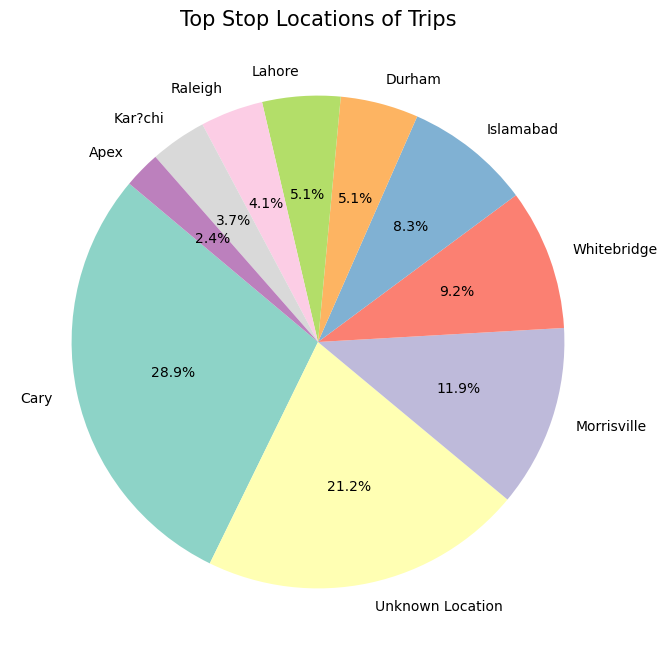

In [37]:
# Q.14) Which are the top stop locations?

top_stop_locations = df["STOP*"].value_counts().head(10)
print("Top Stop Locations:")
print(top_stop_locations)
plt.figure(figsize = (12, 8))
plt.pie(
    top_stop_locations.values,
    labels = top_stop_locations.index,
    autopct = '%1.1f%%',
    startangle = 140,
    colors = plt.cm.Set3.colors
)
plt.title("Top Stop Locations of Trips", fontsize = 15)
plt.show()

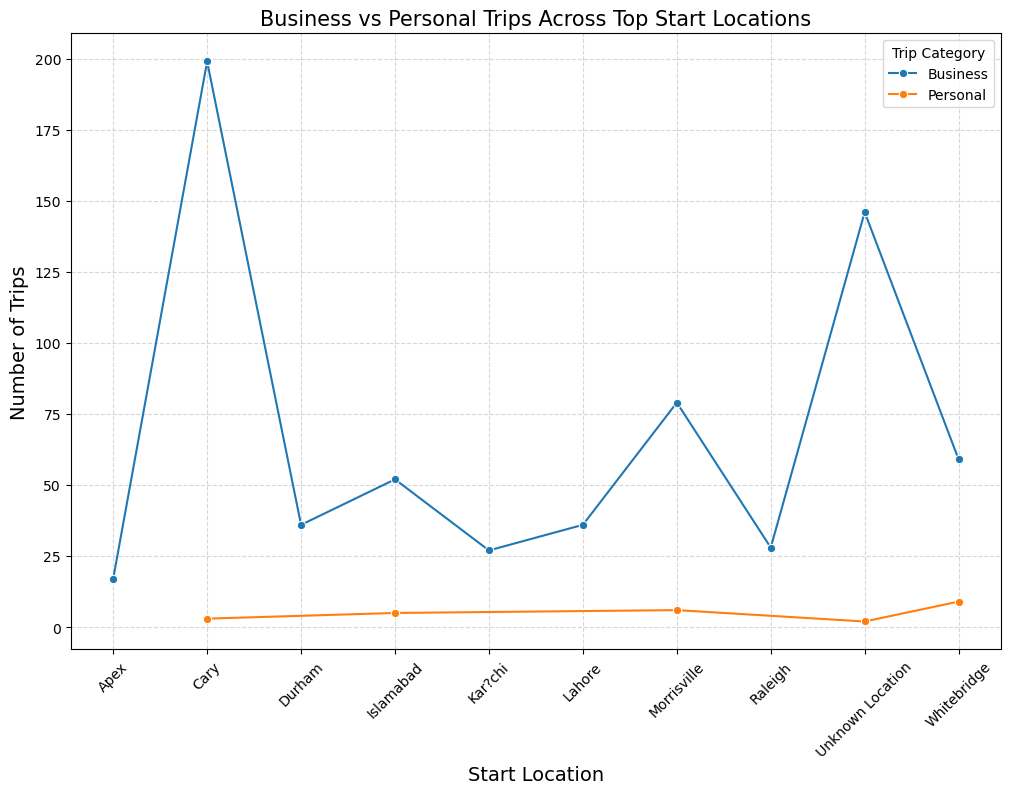

In [38]:
# Q.15) Are business trips concentrated around specific locations compared to personal trips?

location_category = df.groupby(["START*", "CATEGORY*"]).size().reset_index(name = "count")
top_locations = location_category.groupby("START*")["count"].sum().sort_values(ascending = False).head(10).index
location_category_top = location_category[location_category["START*"].isin(top_locations)]
plt.figure(figsize = (12, 8))
sns.lineplot(
    data = location_category_top,
    x = "START*",
    y = "count",
    hue = "CATEGORY*",
    marker = "o"
)
plt.title("Business vs Personal Trips Across Top Start Locations", fontsize = 15)
plt.xlabel("Start Location", fontsize = 14)
plt.ylabel("Number of Trips", fontsize = 14)
plt.xticks(rotation = 45)
plt.legend(title = "Trip Category")
plt.grid(True, linestyle = "--", alpha = 0.5)
plt.show()

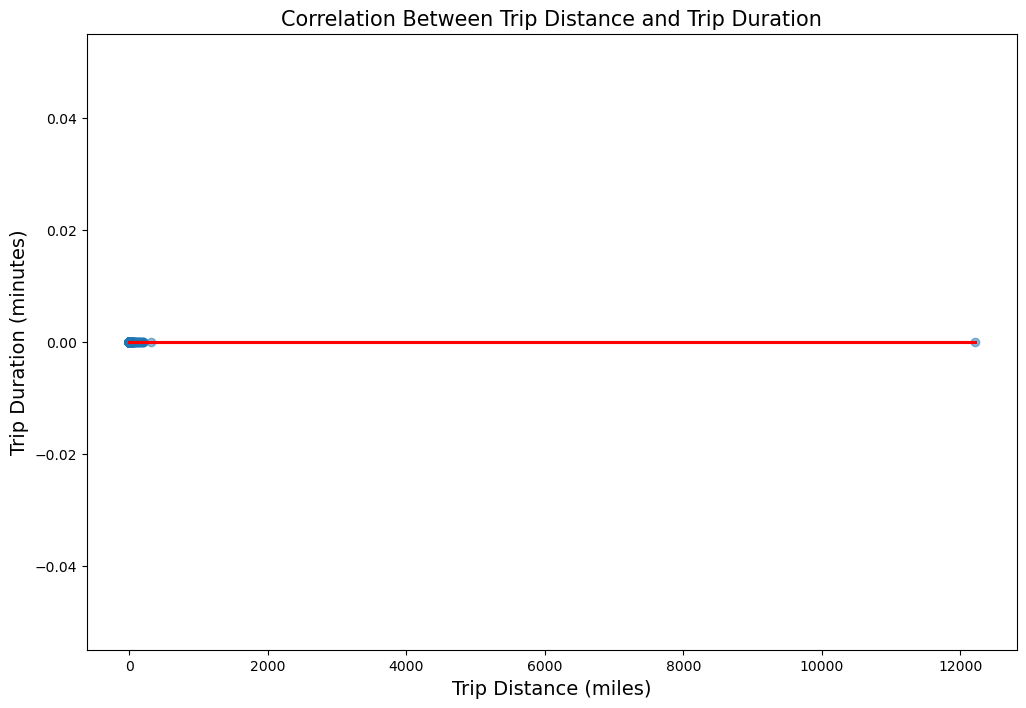

Correlation between trip distance and trip duration: nan


In [39]:
# Q.16) Is there a correlation between trip distance and trip duration?

plt.figure(figsize = (12, 8))
sns.regplot(
    data = df,
    x = "MILES*",
    y = "trip_duration",
    scatter_kws = {"alpha":0.5},
    line_kws = {"color":"red"}
)
plt.title("Correlation Between Trip Distance and Trip Duration", fontsize = 15)
plt.xlabel("Trip Distance (miles)", fontsize = 14)
plt.ylabel("Trip Duration (minutes)", fontsize = 14)
plt.show()
correlation = df["MILES*"].corr(df["trip_duration"])
print(f"Correlation between trip distance and trip duration: {correlation:.2f}")

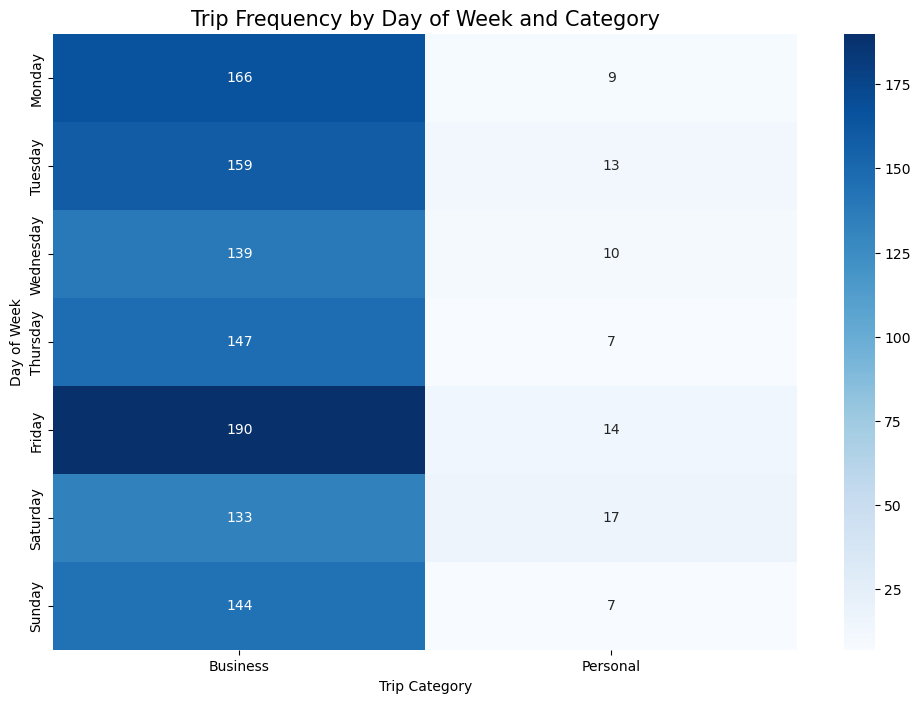

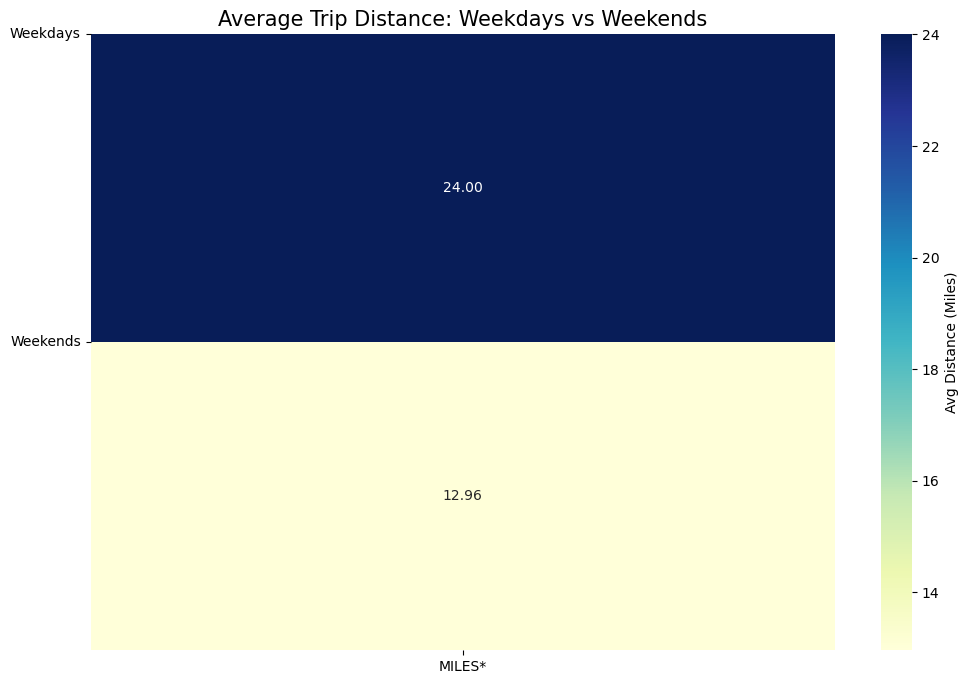

In [40]:
# Q.17) Do trips on weekdays differ from weekends in terms of distance or frequency?

df["day_of_week"] = df["START_DATE*"].dt.day_name()
df["is_weekend"] = df["day_of_week"].isin(["Saturday", "Sunday"])
freq_pivot = df.pivot_table(
    index = "day_of_week",
    columns = "CATEGORY*",
    values = "MILES*",
    aggfunc = "count",
    fill_value = 0
).reindex(
    ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
)
plt.figure(figsize = (12, 8))
sns.heatmap(freq_pivot, annot = True, fmt = "d", cmap = "Blues")
plt.title("Trip Frequency by Day of Week and Category", fontsize = 15)
plt.ylabel("Day of Week")
plt.xlabel("Trip Category")
plt.show()
dist_pivot = df.pivot_table(
    index = "is_weekend",
    values = "MILES*",
    aggfunc = "mean"
)
plt.figure(figsize = (12, 8))
sns.heatmap(dist_pivot, annot = True, cmap = "YlGnBu", fmt = ".2f", cbar_kws = {'label': 'Avg Distance (Miles)'})
plt.title("Average Trip Distance: Weekdays vs Weekends", fontsize = 15)
plt.ylabel("", fontsize = 14)
plt.yticks([0, 1], ["Weekdays","Weekends"], rotation = 0)
plt.show()

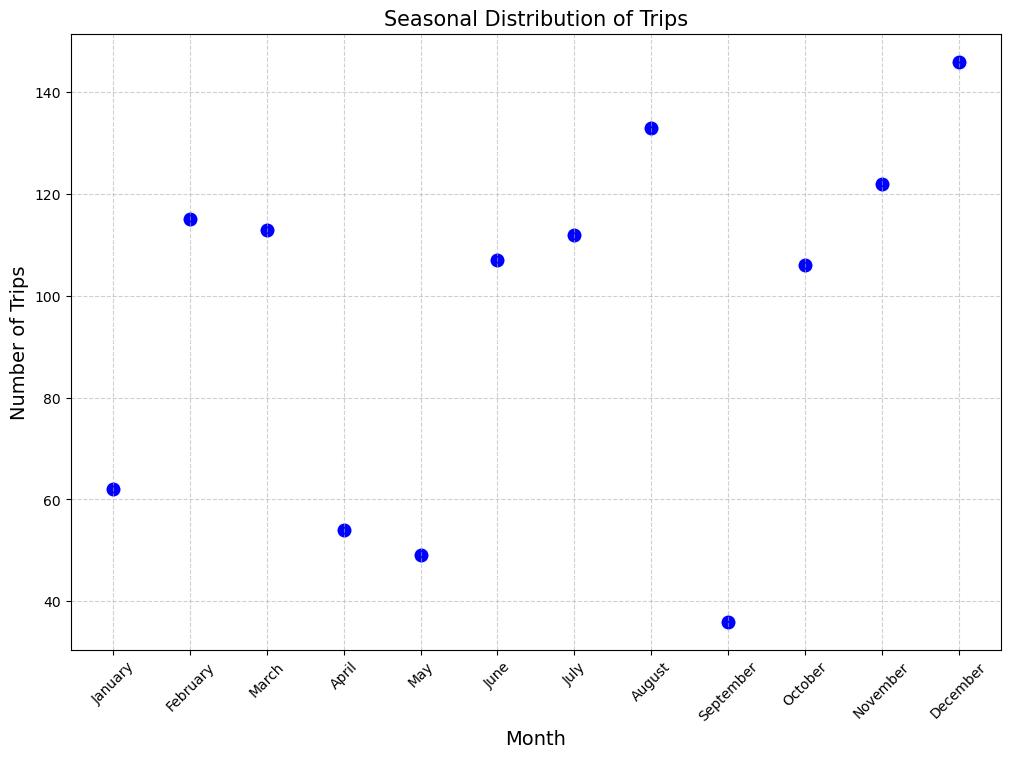

In [41]:
# Q.18) Does the distribution of trips show any seasonal patterns (e.g., more in summer/winter)?

df["month"] = df["START_DATE*"].dt.month_name()
df["month_num"] = df["START_DATE*"].dt.month
trips_per_month = df.groupby("month_num").size().reset_index(name = "trip_count")
trips_per_month["month"] = trips_per_month["month_num"].apply(lambda x: pd.to_datetime(str(x), format = "%m").strftime("%B"))
plt.figure(figsize = (12, 8))
sns.scatterplot(
    data = trips_per_month,
    x = "month",
    y = "trip_count",
    s = 120,
    color = "blue",
    marker = "o"
)
plt.title("Seasonal Distribution of Trips", fontsize = 15)
plt.xlabel("Month", fontsize = 14)
plt.ylabel("Number of Trips", fontsize = 14)
plt.xticks(rotation = 45)
plt.grid(True, linestyle = "--", alpha = 0.6)
plt.show()

In [42]:
%pip install ydata-profiling

Note: you may need to restart the kernel to use updated packages.


In [43]:
from ydata_profiling import ProfileReport

In [44]:
profile = ProfileReport(df, title = "My Uber Drives Analysis Project - 2016 Report")

In [45]:
import os
df = r"D:\My Uber Drives Analysis Project - 2016"
os.chdir(df)

In [46]:
profile.to_file("My Uber Drives Analysis Project - 2016 Report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]